First, we are loading up the libraries needed and the data sets.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

columbiformes_data = pd.read_csv('data/Columbiformes_data.csv', sep='\t')
larus_data = pd.read_csv('data/Larus_data.csv', sep='\t')

In [2]:
columbiformes_data['individualCount'].describe()

count    58046.000000
mean         7.863488
std         98.971652
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      16092.000000
Name: individualCount, dtype: float64

This data is untidy, so we will need to clean it up before we can do any analysis. For one, the maximum individuals in one sighting appear to be 16092, which is more than what a person could count. We will need to remove these outliers. But we first have too see where it would be worth to make the cut.

In [3]:
columbiformes_quantiles = columbiformes_data['individualCount'].quantile([0.25, 0.5, 0.75, 0.9])
larus_quantiles = larus_data['individualCount'].quantile([0.25, 0.5, 0.75, 0.9])

print('Columbiformes quantiles:')
print(columbiformes_quantiles)
print('Larus quantiles:')
print(larus_quantiles)

Columbiformes quantiles:
0.25     1.0
0.50     2.0
0.75     5.0
0.90    12.0
Name: individualCount, dtype: float64
Larus quantiles:
0.25     1.0
0.50     2.0
0.75     7.0
0.90    22.0
Name: individualCount, dtype: float64


Next comes the cleaning of the data. There is one species in both data sets that are not native to the Netherlands, and there is only one observation of them each. This is proably due to error, with a species being misidentified. These observations are removed from the data sets, along with observations that are missing the individual count or those with an individual count of more than 22. This is due to 22 being a suitable margin to draw, as the instances of observations with higher counts are very few, and probably inaccurate.

In [4]:
# columbiformes data with individualCount between 1 and 120, and without Geopelia cuneata
columbiformes_data = columbiformes_data[(columbiformes_data['individualCount'] > 0) & (columbiformes_data['individualCount'] < 23)]
columbiformes_data = columbiformes_data[columbiformes_data['species'] != 'Geopelia cuneata']
print('The number of observations of pigeons are:', columbiformes_data['gbifID'].count())

# larus data with individualCount between 1 and 120, and without Larus delawarensis
larus_data = larus_data[(larus_data['individualCount'] > 0) & (larus_data['individualCount'] < 23)]
larus_data = larus_data[larus_data['species'] != 'Larus delawarensis']
print('The number of observations of gulls are:', larus_data['gbifID'].count())

The number of observations of pigeons are: 55096
The number of observations of gulls are: 38504


Next, the various species in the datasets are identified and these species names are then put into a dictionary where the scientific name is the key, and each item that matches this name is the value. This means that the value is a list of all the observation data of that species. This is done for both data sets.

In [5]:
# sorting data by species
c_species = columbiformes_data['species'].unique()
df_by_c_species = dict()

for specie in c_species:
    df_by_c_species[specie] = columbiformes_data[columbiformes_data['species'] == specie]
    
l_species = larus_data['species'].unique()
df_by_l_species = dict()

for specie in l_species:
    df_by_l_species[specie] = larus_data[larus_data['species'] == specie]


The data is once again sorted, this time by the state or the province in which the observation was made.

In [6]:
# sorting data by stateProvince
states = columbiformes_data['stateProvince'].unique()

c_df_by_states = dict()
l_df_by_states = dict()
for state in states:
    c_df_by_states[state] = columbiformes_data[columbiformes_data['stateProvince'] == state]
    l_df_by_states[state] = larus_data[larus_data['stateProvince'] == state]

This first graph focuses on North Holland, with Amsterdam being marked as a point of reference. The sizes of the dots refers to the number of individuals that were observed, with the larger dots representing a higher number of individuals. Transparency is used to represent the number of observations in the area, as the number of observations grows, the colour becomes brighter.

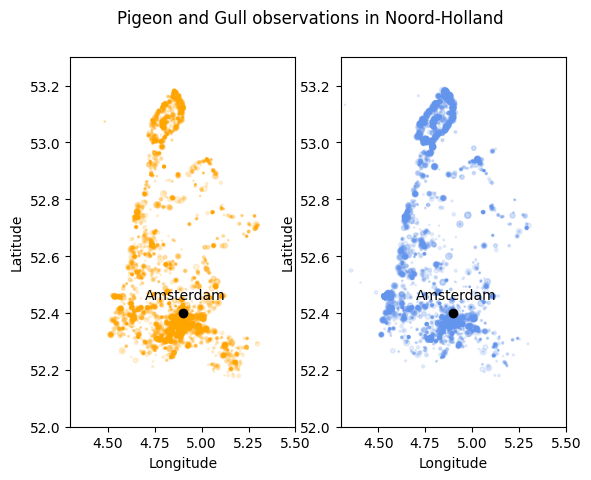

In [7]:
# plotting a province
# change limits to aspect ratio of province
# create a list of cities with coordinates for name and black dot (cities dict)

def plot_bird_by_province(province):
    datasets = [(c_df_by_states[province], 'orange'), (l_df_by_states[province], 'cornflowerblue')]
    i = 1
    for birdset, bird_color in datasets:
        plt.subplot(1, 2, i)
        plt.scatter(birdset['decimalLongitude'], birdset['decimalLatitude'], s=birdset['individualCount'], alpha=0.15, color = bird_color)
        plt.annotate('Amsterdam', (4.7, 52.45))
        plt.plot(4.9, 52.4, 'o', color='black')
        plt.xlim(4.3, 5.5)
        plt.ylim(52, 53.3)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        i += 1
    
    plt.suptitle(f'Pigeon and Gull observations in {province}')
    plt.show()

plot_bird_by_province('Noord-Holland')

These next few graphs represent the different species of gulls and pigeons and the map shows their spread in the whole of the Netherlands.

3 Columba pigeons
Of the three Columba pigeons native to Europe, Columba oenas or the stock dove is the least widespread, while Columba livia, the rock dove or the feral pigeon is by far the most widespread. However, this does not reflect in the observations, perhaps because the humble C. livia is too common to be remarked upon.
The stock dove is also very similar to the rock dove, and with the feral version of this bird bearing varying markings, it is possible that in some cases the rock dove was mistaken for the stock dove.

3 Steptopelia doves
S. decaocto - Eurasian collared dove
S. turtur - European turtle dove
S. orientalis - Oriental turtle dove

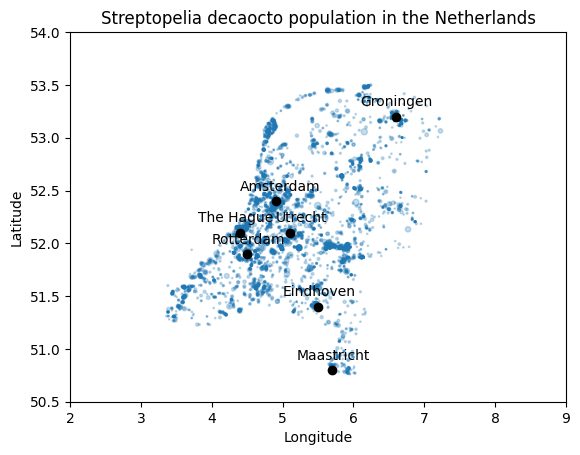

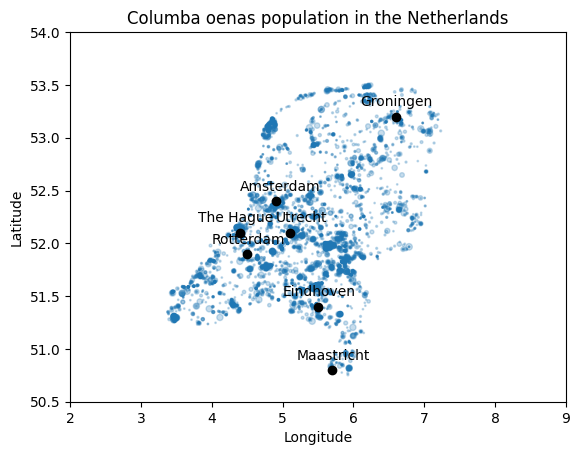

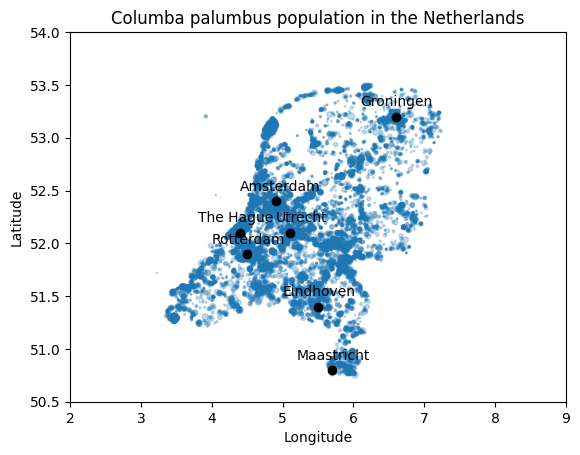

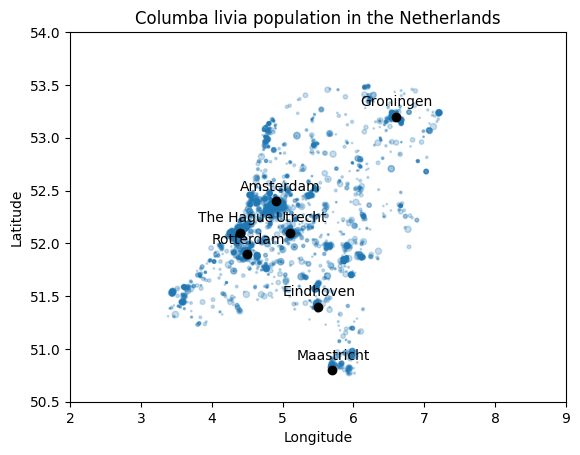

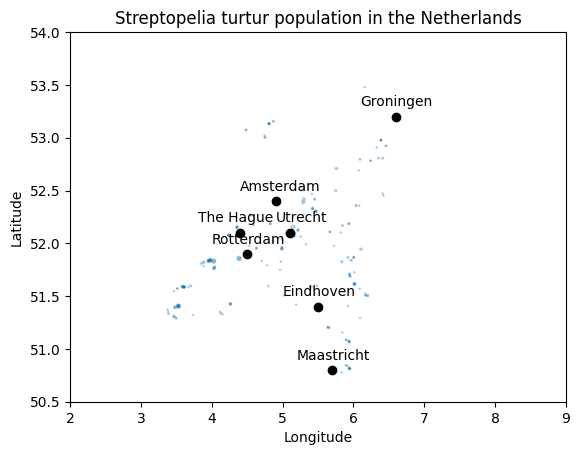

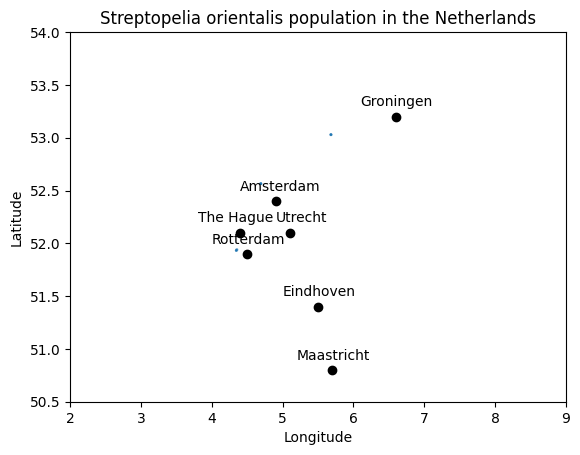

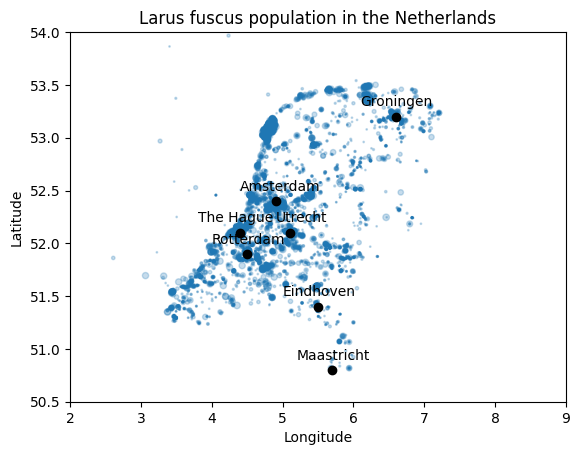

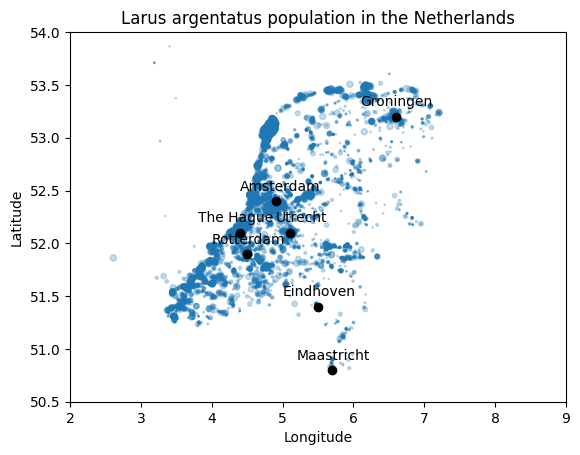

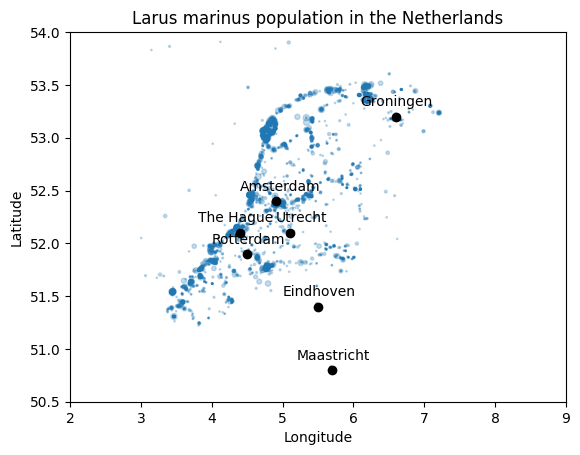

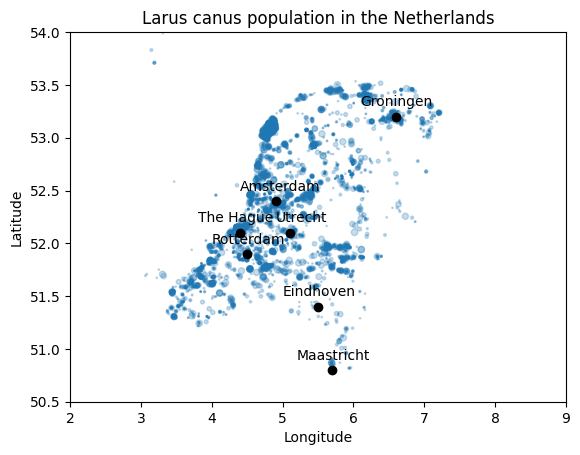

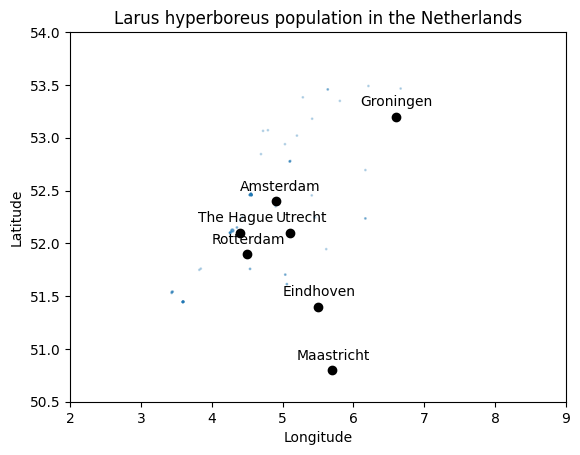

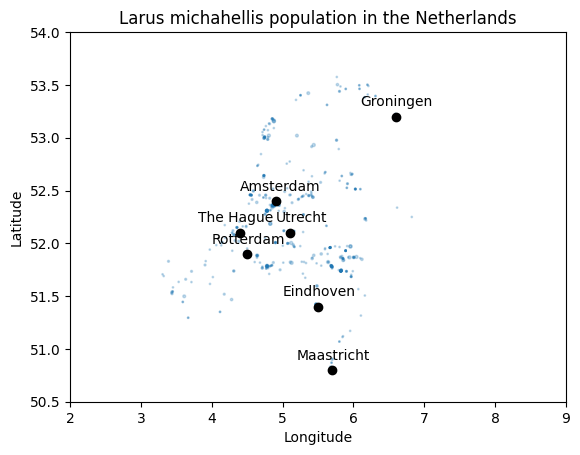

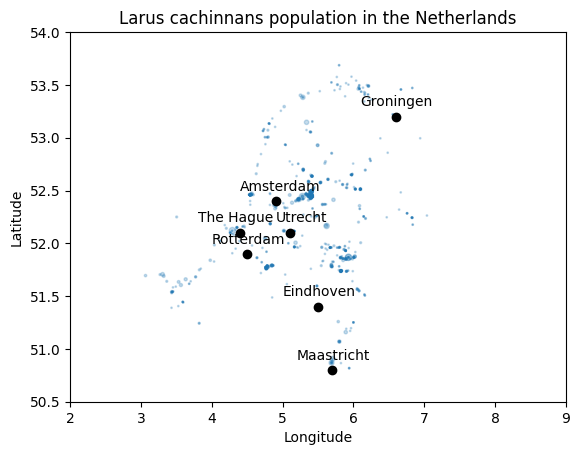

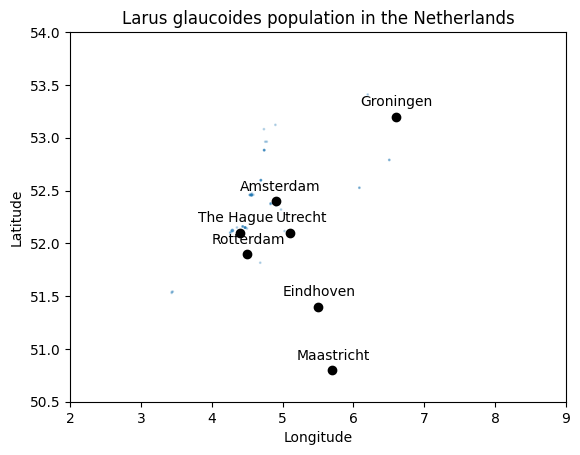

In [8]:
# all data plotted
bird_families = [(c_species, df_by_c_species), (l_species, df_by_l_species)]
for family, family_df in bird_families:
    for specie in family:
        specie_df = family_df[specie]
        plt.scatter(specie_df['decimalLongitude'], specie_df['decimalLatitude'], s=specie_df['individualCount'], alpha=0.25)
        plt.title((specie + ' population in the Netherlands'))
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.xlim(2, 9)
        plt.ylim(50.5, 54)
        plt.annotate('Amsterdam', (4.4, 52.5))
        plt.plot(4.9, 52.4, 'o', color='black')
        plt.annotate('The Hague', (3.8, 52.2))
        plt.plot(4.4, 52.1, 'o', color='black')
        plt.annotate('Rotterdam', (4, 52))
        plt.plot(4.5, 51.9, 'o', color='black')
        plt.annotate('Utrecht', (4.9, 52.2))
        plt.plot(5.1, 52.1, 'o', color='black')
        plt.annotate('Eindhoven', (5, 51.5))
        plt.plot(5.5, 51.4, 'o', color='black')
        plt.annotate('Groningen', (6.1, 53.3))
        plt.plot(6.6, 53.2, 'o', color='black')
        plt.annotate('Maastricht', (5.2, 50.9))
        plt.plot(5.7, 50.8, 'o', color='black')
        plt.show()

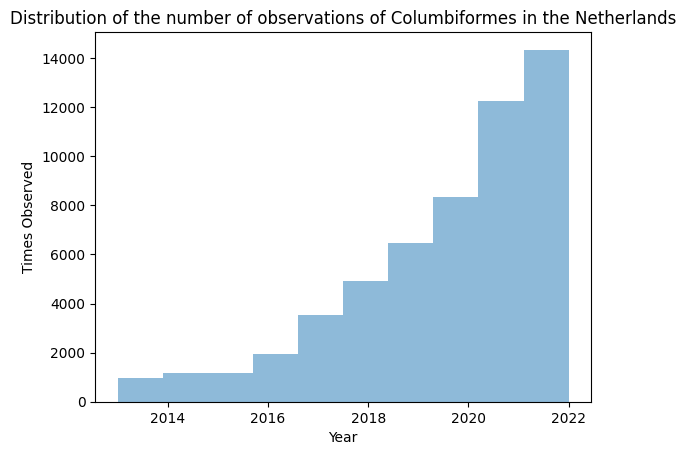

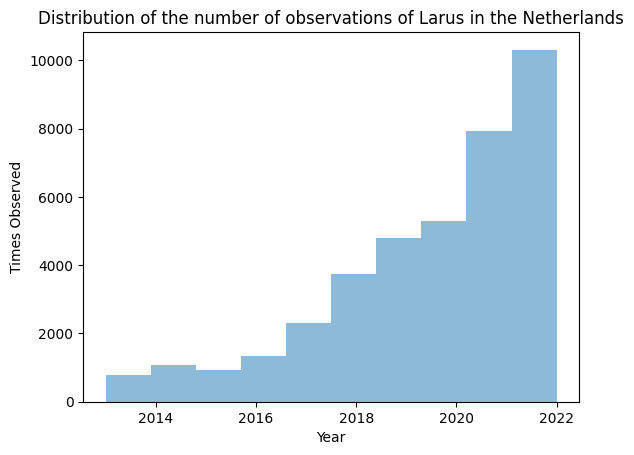

In [9]:
# Plot the distribution of the number of observations of Columbiformes and Larus in the Netherlands

plt.hist(columbiformes_data['year'], bins=10, alpha=0.5, label='Columbiformes')
plt.xlabel('Year')
plt.ylabel('Times Observed')
plt.title('Distribution of the number of observations of Columbiformes in the Netherlands')
plt.show()

plt.hist(larus_data['year'], bins=10, alpha=0.5, label='Larus')
plt.xlabel('Year')
plt.ylabel('Times Observed')
plt.title('Distribution of the number of observations of Larus in the Netherlands')
plt.show()

Hypothesis: More people, more observations of birds
bird observations per person should be constant
differences from average

counties with highest and lowest observations per person

1 Sample T test

deviations from average - significantly different from average?

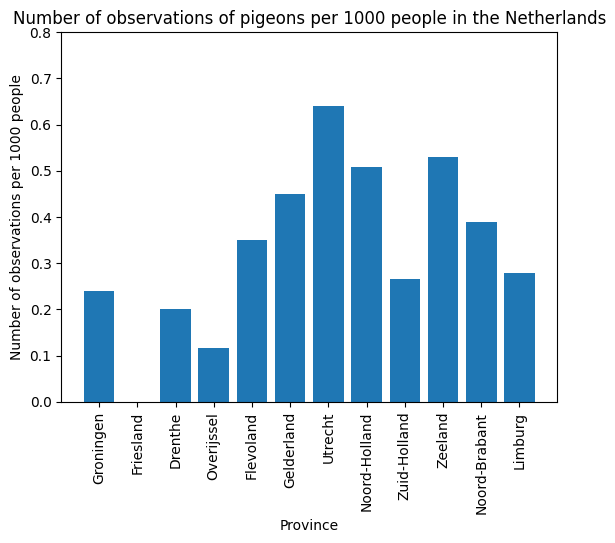

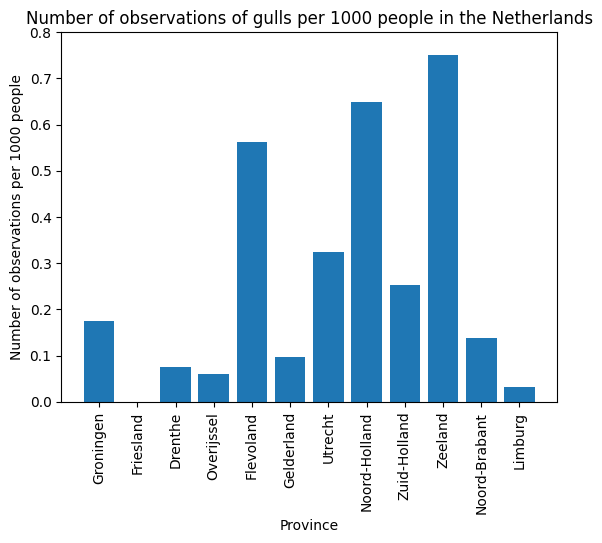

0.6399778219667227
0.11549161787502267
0.7510013351134847
0.03135630346809675


In [13]:
# dictionary of population of the Netherlands in 2019 by province (source: https://www.cbs.nl/nl-nl/maatwerk/2019/34/bevolking-naar-provincie-en-geslacht-1-januari-2019)
population_2019 = {'Groningen': 585866, 'Friesland': 649957, 'Drenthe': 493682, 'Overijssel': 1168916, 'Flevoland': 423021, 'Gelderland': 2090535, 'Utrecht': 1356297, 'Noord-Holland': 2876632, 'Zuid-Holland': 3705872, 'Zeeland': 383488, 'Noord-Brabant': 2540309, 'Limburg': 1116203}

pigeons_2019 = columbiformes_data[columbiformes_data['year'] == 2019]
gulls_2019 = larus_data[larus_data['year'] == 2019]

# calculate the number of observations per 1000 people
pigeons_per_1000 = dict()
gulls_per_1000 = dict()
for province in population_2019:
    pigeons_per_1000[province] = (pigeons_2019[pigeons_2019['stateProvince'] == province]['gbifID'].count() / population_2019[province]) * 1000
    gulls_per_1000[province] = (gulls_2019[gulls_2019['stateProvince'] == province]['gbifID'].count() / population_2019[province]) * 1000

# plot the number of observations per 1000 people
plt.bar(range(len(pigeons_per_1000)), list(pigeons_per_1000.values()), align='center')
plt.xticks(range(len(pigeons_per_1000)), list(pigeons_per_1000.keys()), rotation=90)
plt.ylim(0, 0.8)
plt.xlabel('Province')
plt.ylabel('Number of observations per 1000 people')
plt.title('Number of observations of pigeons per 1000 people in the Netherlands')
plt.show()

plt.bar(range(len(gulls_per_1000)), list(gulls_per_1000.values()), align='center')
plt.xticks(range(len(gulls_per_1000)), list(gulls_per_1000.keys()), rotation=90)
plt.ylim(0, 0.8)
plt.xlabel('Province')
plt.ylabel('Number of observations per 1000 people')
plt.title('Number of observations of gulls per 1000 people in the Netherlands')
plt.show()


print(pigeons_per_1000['Utrecht'])
print(pigeons_per_1000['Overijssel'])
print(gulls_per_1000['Zeeland'])
print(gulls_per_1000['Limburg'])

In [11]:
# 1 sample t-test
pigeons_mean = np.mean(list(pigeons_per_1000.values()))
print('The average number of pigeon observations per person in the Netherlands is:',pigeons_mean)

# list of the values of pigeons_per_1000
pigeons_values = list(pigeons_per_1000.values())

# 1 sample t-test for pigeons
pigeon_stat, pigeon_pval = ttest_1samp(pigeons_values, 0.33)
print('The p-value for the pigeons is:', pigeon_pval)


The average number of pigeon observations per person in the Netherlands is: 0.33067629959399136
The p-value for the pigeons is: 0.9900697551004565


Here, the hypothesis is that the number of observations of gulls per person is higher in the coastal provinces than in the inland provinces. The null hypothesis is that there is no difference in the number of observations per person between the coastal and inland provinces. The null hypothesis is rejected if the p-value is less than 0.05.

In [12]:
seaside_provinces = ['Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Flevoland', 'Groningen']
landlocked_provinces = ['Drenthe', 'Overijssel', 'Gelderland', 'Utrecht', 'Noord-Brabant', 'Limburg']
# leaving out Friesland because there are no observations from there in 2019 and it would scew our coastal data

# list of the values of gulls_per_1000 for the seaside provinces
gulls_seaside = list()
for province in seaside_provinces:
    gulls_seaside.append(gulls_per_1000[province])

# list of the values of gulls_per_1000 for the landlocked provinces
gulls_landlocked = list()
for province in landlocked_provinces:
    gulls_landlocked.append(gulls_per_1000[province])

# 2 Sample T-test for gulls
gulls_stat, gulls_pval = ttest_ind(gulls_seaside, gulls_landlocked)
print('The p-value for the gulls is:', gulls_pval)
print(gulls_stat)

The p-value for the gulls is: 0.011289217339983995
3.1742160384627547


Since the p-value is 0.01, which is less than 0.05, the null hypothesis is rejected. This means that there is a significant difference in the number of observations per 1000 people between the coastal and inland provinces.

# Conclusions

From our observations in mapping the data for Noord-Holland, we can see that the observations for both pigeons and gulls are made in fairly similar areas. This might show areas that people travel to for birdwatching, or it might mean that avid users of eBird live nearby. There are more observations in the more densely populated areas, and cities like Amsterdam, Rotterdam and the Hague can be clearly seen on the scattermaps as they have lots of observations.

Bird observations also grow over time. This is probably due to the growing popularity of the app.

The number of observations per person is not constant, with some areas having a higher number of observations per person than others. In the observations of pigeons, the province of Utrecht is in the lead with about 6.4 observations of pigeons per 10,000 people in 2019, while Overijssel come last with 1.2 observations (not counting Friesland, for which no data is available). In the observations of gulls however, Zeeland is leading, with about 7.5 observations of gulls per 10,000 people in 2019, and Limburg coming last with 0.3 (again, not counting Friesland).

This could be due to the fact that some areas are more popular with birdwatchers than others, or that some areas are more popular with certain species of birds than others. For example, coastal areas are more likely to have more observations of gulls than inland areas, as shown by our 2 Sample T-test. Friesland is an interesting anomaly, as for 2019, there are no observations of pigeons or gulls in the province.